In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from word2number import w2n

# Single Variable

In [3]:
df = pd.DataFrame({
    'area': [2600, 3000, 3200, 3600, 4000],
    'price': [550000, 565000, 610000, 680000, 725000]
})

df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


/tmp/ipykernel_10423/57683305.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


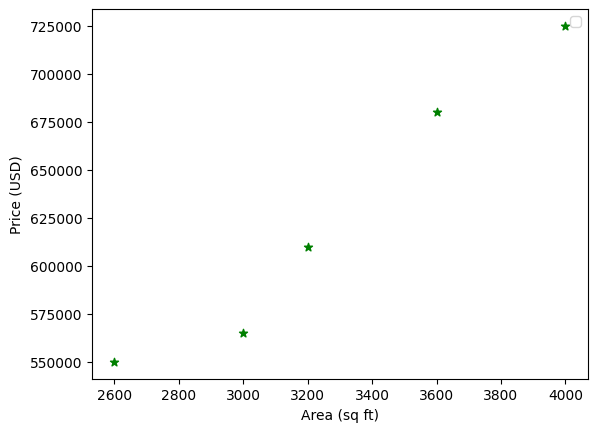

In [ ]:
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')

plt.scatter(df['area'], df['price'], color='green', marker='*')

In [21]:
model = LinearRegression()
model.fit(df[['area']], df['price'])
# prediction = model.predict([[3300]])
prediction = model.predict([[5000]])
prediction[0]

/run/media/galib/Developer/AI-Olympiad/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(859554.7945205481)

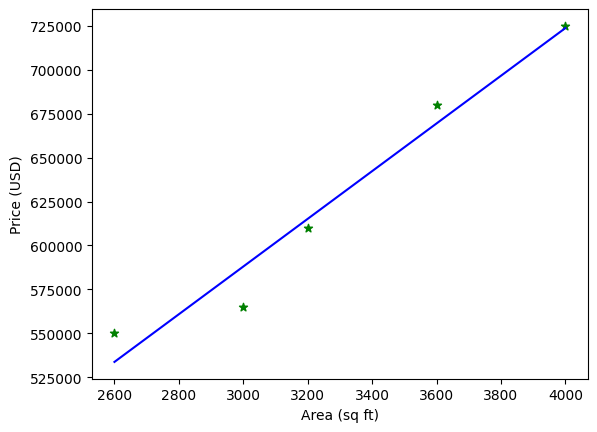

In [32]:
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (USD)')
plt.scatter(df['area'], df['price'], color='green', marker='*')
plt.plot(df['area'], model.predict(df[['area']]), color='blue')

In [23]:
print(model.coef_[0])
print(model.intercept_)

135.78767123287673
180616.43835616432


In [29]:
d = pd.DataFrame({
    'area' : [1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100 ]
})
d['price'] = model.predict(d[['area']])
d['price'] = d['price'].astype(int)
d

,area,price
0,1000,316404
1,1500,384297
2,2300,492928
3,3540,661304
4,4120,740061
5,4560,799808
6,5490,926090
7,3460,650441
8,4750,825607
9,2300,492928


# Excercise

In [35]:
data = pd.read_csv('Dataset/data/canada_per_capita_income.csv')
data.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [43]:
model1 = LinearRegression()
model1.fit(data[['year']], data['per capita income (US$)'])
prediction1 = model1.predict([[2020]])
prediction[0]

/run/media/galib/Developer/AI-Olympiad/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(41288.69409441762)

# Multiple Variable

In [6]:
data = pd.DataFrame({
    'area' : [2600, 3000, 3200, 3600, 4000],
    'bedrooms' : [3, 4, np.nan, 3, 4],
    'age' : [10, 15, 18, 30, 8],
    'price' : [550000, 565000, 610000, 680000, 725000]
})

data

,area,bedrooms,age,price
0,2600,3.0,10,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,680000
4,4000,4.0,8,725000


In [7]:
data['bedrooms'] = data['bedrooms'].fillna(data['bedrooms'].median()).astype(int)
data

,area,bedrooms,age,price
0,2600,3,10,550000
1,3000,4,15,565000
2,3200,3,18,610000
3,3600,3,30,680000
4,4000,4,8,725000


In [14]:
model2 = LinearRegression()
model2.fit(data[['area', 'bedrooms', 'age']], data['price'])
prediction2 = model2.predict([[2500, 4, 5]])
prediction2[0]

/run/media/galib/Developer/AI-Olympiad/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(501449.4011763872)

# Exercise

In [26]:
data = pd.read_csv('Dataset/data/hiring.csv')
data['experience'] = data['experience'].fillna('zero')
data.experience = data.experience.apply(w2n.word_to_num)
data['test_score(out of 10)'] = data['test_score(out of 10)'].fillna(data['test_score(out of 10)'].median())
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [27]:
model3 = LinearRegression()
model3.fit(data[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], data['salary($)'])
prediction3 = model3.predict([[2, 9, 6]])
prediction3[0]

/run/media/galib/Developer/AI-Olympiad/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


np.float64(53205.96797671033)